PSNR for Average Filter (5x5): 23.525606228094947
PSNR for Median Filter (5x5): 24.535047039543056
PSNR for Average Filter (3x3): 23.374968868706834
PSNR for Average Filter (5x5): 23.525606228094947
PSNR for Average Filter (7x7): 22.862390676172595
PSNR for Harmonic Mean Filter (5x5): 23.057555139849818
PSNR for Geometric Mean Filter (5x5): 24.073354428913575


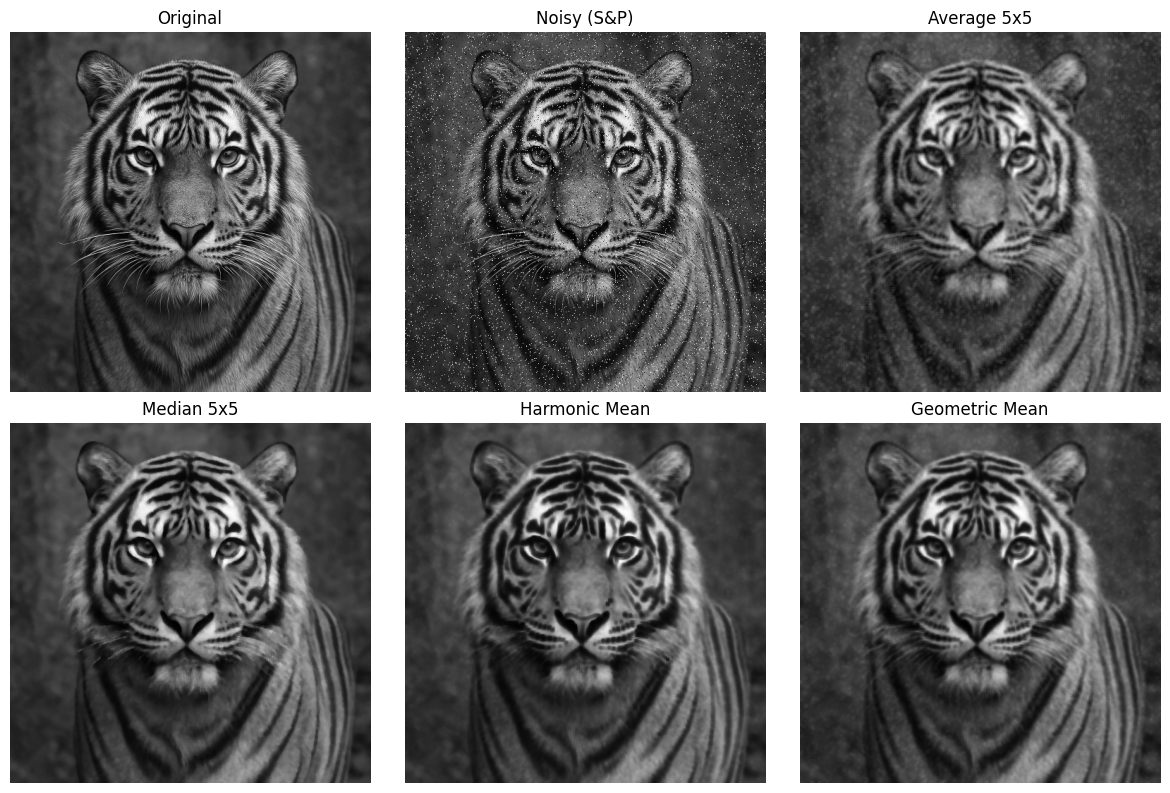

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio as psnr
from scipy.ndimage import generic_filter

# Load grayscale image and resize to 512x512
image = cv2.imread('images/tiger.png', cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (512, 512))

# Add salt and pepper noise
noisy_image = random_noise(image, mode='s&p', amount=0.05)
noisy_image = (noisy_image * 255).astype(np.uint8)

# Function to apply average filter
def average_filter(img, ksize):
    return cv2.blur(img, (ksize, ksize))

# Function to apply median filter
def median_filter(img, ksize):
    return cv2.medianBlur(img, ksize)

# Harmonic mean filter
def harmonic_mean_filter(img, ksize):
    def harmonic_mean(values):
        values = values[values > 0]  # Avoid division by zero
        return len(values) / np.sum(1.0 / values) if len(values) > 0 else 0
    return generic_filter(img.astype(np.float64), harmonic_mean, size=ksize)

# Geometric mean filter
def geometric_mean_filter(img, ksize):
    def geometric_mean(values):
        values = values[values > 0]
        return np.exp(np.mean(np.log(values))) if len(values) > 0 else 0
    return generic_filter(img.astype(np.float64), geometric_mean, size=ksize)

# (a) Average and Median filter with 5x5
avg_5x5 = average_filter(noisy_image, 5)
med_5x5 = median_filter(noisy_image, 5)

print("PSNR for Average Filter (5x5):", psnr(image, avg_5x5))
print("PSNR for Median Filter (5x5):", psnr(image, med_5x5))

# (b) Average filter with 3x3, 5x5, 7x7
for k in [3, 5, 7]:
    filtered = average_filter(noisy_image, k)
    print(f"PSNR for Average Filter ({k}x{k}):", psnr(image, filtered))

# (c) Harmonic and Geometric mean filters
harmonic_filtered = harmonic_mean_filter(noisy_image, 5)
geometric_filtered = geometric_mean_filter(noisy_image, 5)

print("PSNR for Harmonic Mean Filter (5x5):", psnr(image, harmonic_filtered.astype(np.uint8)))
print("PSNR for Geometric Mean Filter (5x5):", psnr(image, geometric_filtered.astype(np.uint8)))

# Display results
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
plt.title("Original")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title("Noisy (S&P)")
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title("Average 5x5")
plt.imshow(avg_5x5, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.title("Median 5x5")
plt.imshow(med_5x5, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.title("Harmonic Mean")
plt.imshow(harmonic_filtered.astype(np.uint8), cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.title("Geometric Mean")
plt.imshow(geometric_filtered.astype(np.uint8), cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()
